# Statistics on missing CA and CB atoms AND side chain angles

## Aims of this notebook

### 1. Missing CA and CB atoms

In our fingerprint, both the exposure and side chain angle features are dependent on CA and CB atoms.
Here, we investigate where and overall how often these atoms are missing in the KLIFS data.

1. Get for each KLIFS molecule CA and CB atom coordinates per residue position.
2. Calculate missing atom rate per residue position: CA, CB and CA+CB missing.

### 2. Side chain angle (SCA) distribution

Side chain angles describe the angle between Ca, Cb, and residue centroid (without backbone atoms and hydrogens). 

Small amino acids (with tiny side chains) should not show much angle diversion (with smaller angles), larger ones should (with larger angles).

1. Calculate for each amino acid the angle distribution.
2. Save molecule and residue code for each angle, in order to trace back interesting angles.
3. Check diversity of angles per amino acid. If no diversity observed, side chain angle might not be such a good measure, since it does not depend on structural conformation but solely on amino acid type.

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from pathlib import Path
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../..')
from kissim.auxiliary import KlifsMoleculeLoader
from kissim.analysis import GapRate, SideChainAngleGenerator, SideChainAngleAnalyser

sns.set()
%matplotlib inline

In [4]:
warnings.filterwarnings(action='once')

## IO paths

In [5]:
path_to_kinsim = Path('.') / '..' / '..'
path_to_data = path_to_kinsim / 'examples' / 'data'
path_to_results = path_to_kinsim / 'examples' / 'results' / 'features' / 'sca_centroid_wo_backbone' 

## Load KLIFS metadata

In [6]:
klifs_metadata = pd.read_csv(path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv' , index_col=0)

In [7]:
klifs_metadata.shape

(3878, 23)

## Data generation

### Gap rate

In [8]:
gap_rate = GapRate(klifs_metadata)

### Side chain angle

## Data analysis

### Gap rate

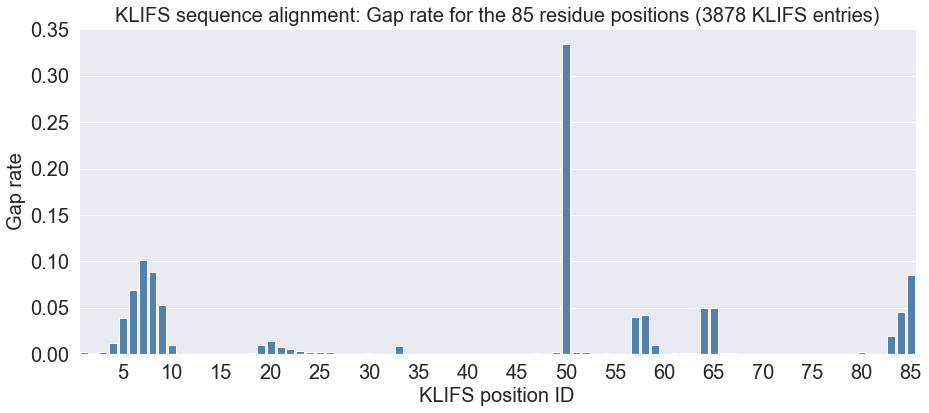

In [9]:
gap_rate.plot_gap_rate(
    path_to_results
)

### Missing CA and CB atoms

In [10]:
side_chain_angle_analyser = SideChainAngleAnalyser()
side_chain_angle_analyser.load_data(path_to_results / 'side_chain_angles.p')

In [11]:
a=side_chain_angle_analyser.data[(side_chain_angle_analyser.data.residue_name=='LYS')].centroid
print(a.shape)
print(a.dropna().shape)

(23572,)
(22247,)


In [12]:
side_chain_angle_analyser.data.shape

(325170, 8)

In [13]:
side_chain_angle_analyser.get_missing_residues_ca_cb(gap_rate)

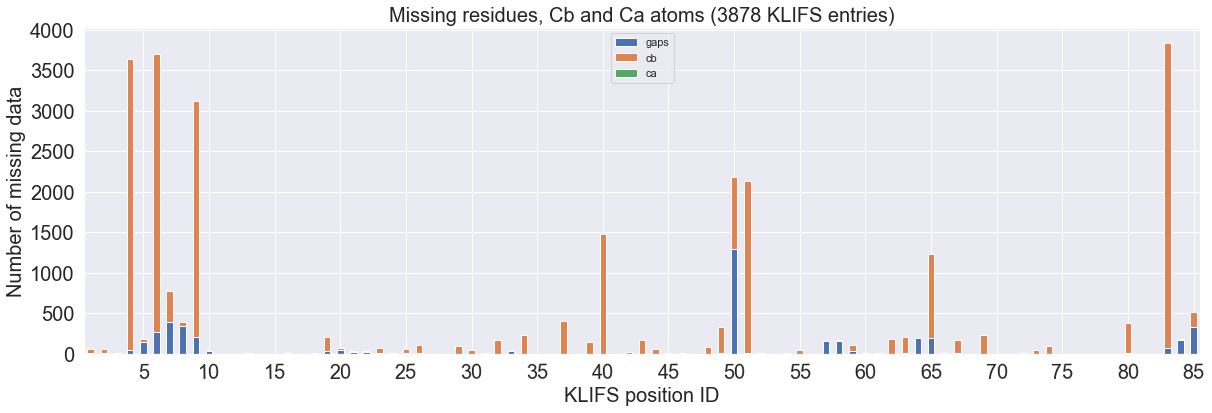

In [14]:
side_chain_angle_analyser.plot_missing_residues_ca_cb(
    path_to_results
)

In [15]:
# How many residues have a missing Cb but are not GLY?
side_chain_angle_analyser.data[
    (side_chain_angle_analyser.data.cb.isna()) &
    (side_chain_angle_analyser.data.residue_name != 'GLY')
].shape

(50, 8)

### SCA angle distribution

Plotting standard amino acids (violin)...


/home/dominique/anaconda2/envs/kinsim/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


Plotting non-standard amino acids (violin)...


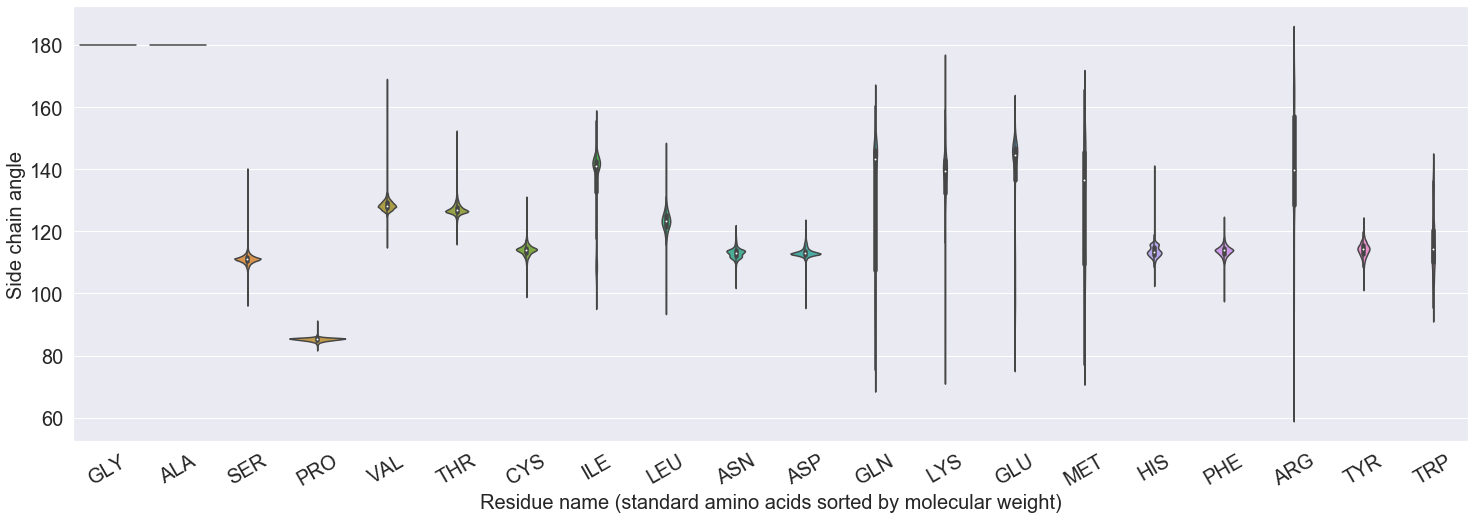

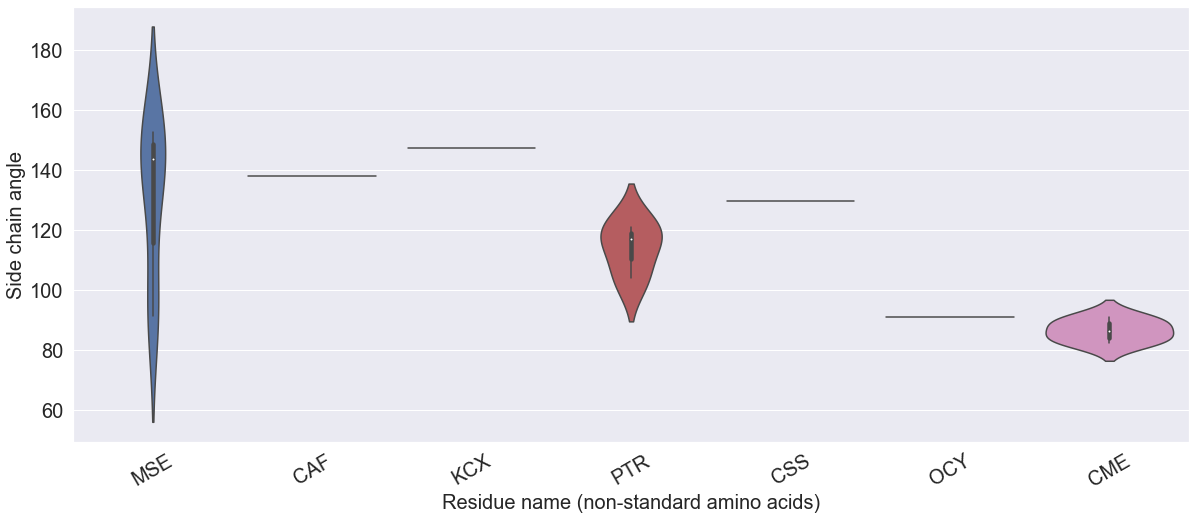

In [16]:
side_chain_angle_analyser.plot_side_chain_angle_distribution(
    path_to_results, 
    kind='violin'
)

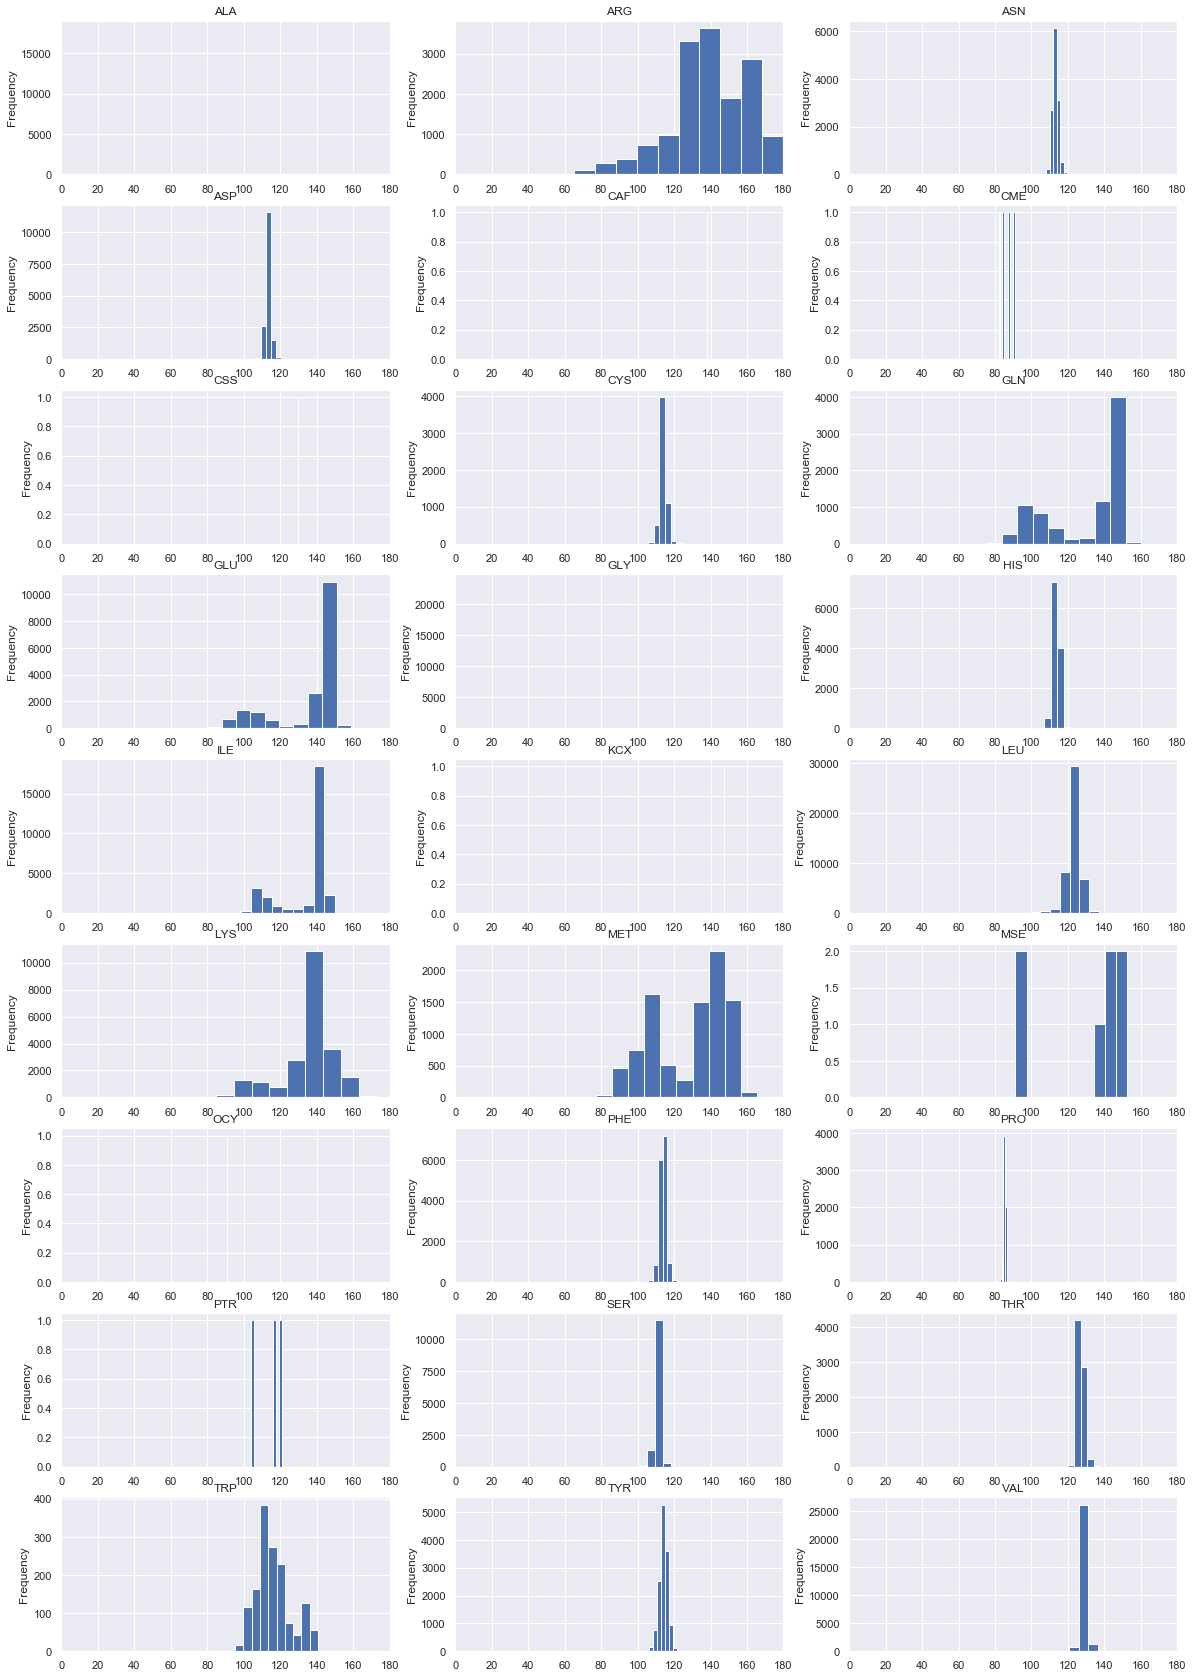

In [17]:
side_chain_angle_analyser.plot_side_chain_angle_distribution(
    path_to_results, 
    kind='histograms'
)

### SCA statistics

In [18]:
side_chain_angle_analyser.data[['residue_name', 'sca']].groupby('residue_name').describe()

sca                                                   \
                count        mean        std     min       25%     50%   
residue_name                                                             
ALA           18169.0  180.000000   0.000000  180.00  180.0000  180.00   
ARG           15118.0  139.457328  21.162362   65.00  128.5800  139.60   
ASN           12870.0  113.040018   1.594990  102.19  111.9500  113.11   
ASP           15935.0  113.243073   1.432848   95.69  112.5000  112.96   
CAF               1.0  138.050000        NaN  138.05  138.0500  138.05   
CME               4.0   86.390000   3.850316   82.14   83.8800   86.30   
CSS               1.0  129.710000        NaN  129.71  129.7100  129.71   
CYS            5739.0  113.941361   1.738638   99.45  113.1600  114.06   
GLN            8057.0  130.428308  20.878786   75.31  107.6900  143.38   
GLU           18268.0  135.699735  18.014075   80.04  136.6125  144.57   
GLY           23638.0  180.000000   0.000000  180.00  180.0000  180.00   
HIS           11884.0  113.553451   1.844308  102.95  112.3500  113.40   
ILE           28857.0  134.488711  13.267017   98.40  132.5700  141.19   
KCX               1.0  147.240000        NaN  147.24  147.2400  147.24   
LEU           46234.0  123.092825   3.768831   94.23  121.3600  123.29   
LYS           22247.0  135.732308  14.734896   74.92  132.3850  139.57   
MET            9097.0  128.777617  19.895930   77.07  109.6200  136.52   
MSE               7.0  130.777143  26.007939   91.17  115.5800  143.49   
OCY               1.0   91.010000        NaN   91.01   91.0100   91.01   
PHE           15186.0  113.801681   1.811246   98.00  112.8400  113.84   
PRO            6700.0   85.238136   0.530678   81.83   84.9500   85.32   
PTR               3.0  113.946667   8.972632  103.86  110.4000  116.94   
SER           13147.0  111.009213   1.374211   96.49  110.3800  111.07   
THR            7373.0  127.067995   1.632389  116.37  126.1600  126.77   
TRP            1480.0  116.268243   9.503356   95.37  110.0600  114.32   
TYR           13383.0  114.096298   2.325617  101.75  112.7100  114.20   
VAL           28250.0  128.461344   1.638289  115.20  127.4400  128.30   

                                
                   75%     max  
residue_name                    
ALA           180.0000  180.00  
ARG           157.1675  179.94  
ASN           113.9300  121.54  
ASP           113.7100  123.34  
CAF           138.0500  138.05  
CME            88.8100   90.82  
CSS           129.7100  129.71  
CYS           114.7900  130.55  
GLN           146.0400  160.34  
GLU           146.7125  158.84  
GLY           180.0000  180.00  
HIS           114.9600  140.63  
ILE           142.5500  155.53  
KCX           147.2400  147.24  
LEU           125.2200  147.62  
LYS           143.0900  172.91  
MET           145.6200  165.52  
MSE           148.4950  152.63  
OCY            91.0100   91.01  
PHE           114.7300  124.17  
PRO            85.5800   91.08  
PTR           118.9900  121.04  
SER           111.7100  139.82  
THR           127.8000  151.86  
TRP           120.4900  140.67  
TYR           115.5400  123.78  
VAL           129.3400  168.65

Look at extreme (unexpected values)...

In [19]:
side_chain_angle_analyser.data[
    (side_chain_angle_analyser.data.residue_name == 'ARG') & (side_chain_angle_analyser.data.sca < 80)
].head()

,klifs_id,residue_id,residue_name,ca,cb,centroid,sca,klifs_code
65,65,251,ARG,"<Vector 31.37, 8.24, 0.99>","<Vector 32.54, 7.86, 0.05>","<Vector 30.77, 5.76, -0.46>",79.40,HUMAN/AurA_3e5a_chainA
69,69,255,ARG,"<Vector -16.83, 30.16, -10.39>","<Vector -17.01, 30.81, -11.75>","<Vector -15.54, 32.64, -10.41>",77.27,HUMAN/AurA_3uoh_chainB
69,69,255,ARG,"<Vector 16.41, 19.63, -10.12>","<Vector 16.36, 19.06, -11.54>","<Vector 15.25, 16.49, -9.83>",79.66,HUMAN/AurA_3uoj_chainB
69,69,255,ARG,"<Vector -24.99, 4.70, -10.73>","<Vector -24.43, 5.16, -12.07>","<Vector -22.12, 4.84, -10.06>",70.61,HUMAN/AurA_3uol_chainA
23,23,180,ARG,"<Vector -9.09, 24.57, 8.73>","<Vector -8.40, 25.68, 7.93>","<Vector -7.99, 26.58, 10.60>",78.57,HUMAN/AurA_4dhf_chainA


### Visualize SCAs

In [20]:
import time

import nglview as nv

from kissim.auxiliary import split_klifs_code

_ColormakerRegistry()

/home/dominique/anaconda2/envs/kinsim/lib/python3.6/site-packages/nglview/widget.py:162: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`). Passing types is deprecated in traitlets 4.1.
  _ngl_view_id = List(Unicode).tag(sync=True)


In [21]:
def create_viewer(sca_data):

    klifs_code = split_klifs_code(sca_data.klifs_code.iloc[0])
    print(klifs_code)

    pdb_id = klifs_code['pdb_id']
    chain = klifs_code['chain']

    viewer = nv.NGLWidget()
    viewer.add_pdbid(pdb_id)
    viewer.add_representation(repr_type='cartoon', selection='all')
    viewer.remove_ball_and_stick()

    return viewer

In [22]:
def show_sca_features(viewer, sca_data): 

    klifs_code = split_klifs_code(sca_data.klifs_code.iloc[0])

    pdb_id = klifs_code['pdb_id']
    chain = klifs_code['chain']
    
    # Representation parameters
    sphere_radius = 0.3

    colors = {
        'ca': [1, 0, 0],
        'cb': [0, 1, 0],
        'centroid': [0, 0, 1]
    }

    # Show side chain angle feature per residue
    for index, row in sca_data.iterrows():

        res_id = row.residue_id

        try:
            ca = list(row.ca.get_array())
        except AttributeError:
            pass

        try:
            cb = list(row.cb.get_array())
        except AttributeError:
            pass

        try:
            centroid = list(row.centroid.get_array())
        except AttributeError:
            pass

        selection = f'{res_id}:{chain}'

        viewer.add_representation(repr_type='line', selection=selection)
        viewer.shape.add_sphere(ca, colors['ca'], sphere_radius)
        viewer.shape.add_sphere(cb, colors['cb'], sphere_radius)
        viewer.shape.add_sphere(centroid, colors['centroid'], sphere_radius)

In [23]:
def center_on(viewer, sca_data, res_id):
    
    klifs_code = split_klifs_code(sca_data.klifs_code.iloc[0])

    pdb_id = klifs_code['pdb_id']
    chain = klifs_code['chain']
    
    selection = f'{res_id}:{chain}'
        
    viewer.remove_ball_and_stick()
    viewer.add_ball_and_stick(selection=selection)
    viewer.center(selection=selection)

#### Example structure

In [24]:
sca_data = side_chain_angle_analyser.data.groupby('klifs_code').get_group('HUMAN/AurA_3e5a_chainA')

In [25]:
sca_data[sca_data.residue_name=='ARG']

,klifs_id,residue_id,residue_name,ca,cb,centroid,sca,klifs_code
1,1,137,ARG,"<Vector 29.66, 37.80, 21.77>","<Vector 28.49, 37.93, 22.75>","<Vector 25.69, 36.85, 22.06>",121.69,HUMAN/AurA_3e5a_chainA
22,22,179,ARG,"<Vector 42.49, 19.75, 8.02>","<Vector 43.85, 19.18, 7.59>","<Vector 45.59, 19.43, 5.40>",137.21,HUMAN/AurA_3e5a_chainA
23,23,180,ARG,"<Vector 40.25, 16.72, 7.38>","<Vector 40.44, 15.36, 8.06>","<Vector 39.95, 12.55, 8.98>",161.66,HUMAN/AurA_3e5a_chainA
32,32,189,ARG,"<Vector 26.08, 21.21, 0.39>","<Vector 26.26, 21.78, -1.01>","<Vector 27.47, 23.83, -0.78>",106.74,HUMAN/AurA_3e5a_chainA
37,37,195,ARG,"<Vector 27.56, 25.30, 5.88>","<Vector 27.09, 26.54, 5.09>","<Vector 27.31, 26.76, 2.50>",123.57,HUMAN/AurA_3e5a_chainA
55,55,220,ARG,"<Vector 19.57, 22.35, 24.67>","<Vector 20.00, 23.73, 24.17>","<Vector 19.41, 24.89, 27.01>",88.84,HUMAN/AurA_3e5a_chainA
65,65,251,ARG,"<Vector 31.37, 8.24, 0.99>","<Vector 32.54, 7.86, 0.05>","<Vector 30.77, 5.76, -0.46>",79.40,HUMAN/AurA_3e5a_chainA
69,69,255,ARG,"<Vector 30.86, 9.16, 13.30>","<Vector 32.35, 8.90, 12.96>","<Vector 34.87, 8.04, 11.87>",167.28,HUMAN/AurA_3e5a_chainA


In [32]:
viewer = create_viewer(sca_data)
viewer

{'species': 'HUMAN', 'kinase': 'AurA', 'pdb_id': '3e5a', 'alternate_model': None, 'chain': 'A'}


NGLWidget()

In [33]:
show_sca_features(viewer, sca_data)

In [35]:
center_on(viewer, sca_data, 255)

In [36]:
viewer.render_image(),

(Image(value=b'', width='99%'),)

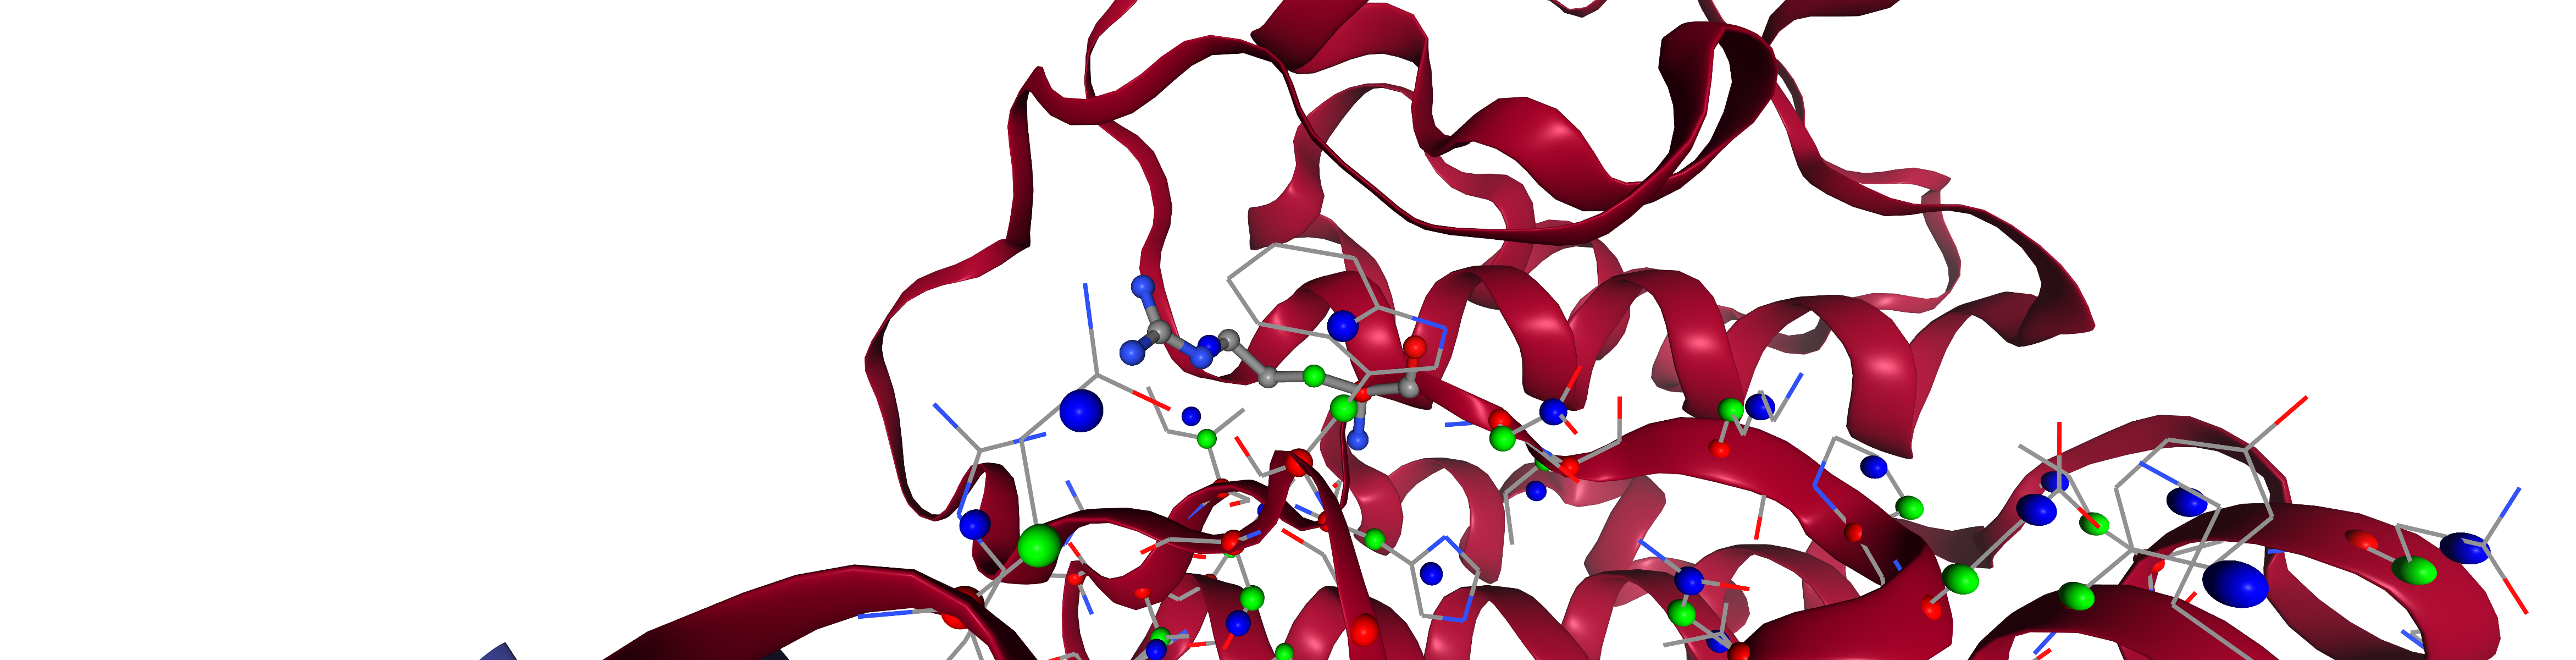

In [37]:
viewer._display_image()

### SCA mean and median

Get mean and median of side chain angles per amino acid and save to file. 
Use these values for residues with missing Ca/Cb atoms.

In [39]:
side_chain_angle_analyser.get_mean_median(
    from_file=path_to_results / 'stats_missing_ca_cb_and_sca.p'
)

,sca_mean,sca_median
residue_name,,
ALA,180.00,180.00
ARG,139.46,139.60
ASN,113.04,113.11
ASP,113.24,112.96
CAF,138.05,138.05
CME,86.39,86.30
CSS,129.71,129.71
CYS,113.94,114.06
GLN,130.43,143.38
